In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
terrorRaw = pd.read_csv('GTD_Data/gtd_0717_final.csv', encoding='ISO-8859-1')

In [3]:
del terrorRaw['Unnamed: 0']
terrorRaw.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'Casualities'],
      dtype='object')

In [4]:
terrorRaw.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,2007,1,1,Pakistan,South Asia,Dera Bugti,29.034412,69.158661,Bombing/Explosion,0.0,0.0,Main gas pipeline and tow power pylons in Balo...,01/1/2007: Baluchistan Liberation Army (BLA) b...,Baloch Liberation Army (BLA),Utilities,Explosives,Unknown,0.0
1,2007,1,4,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,13.0,25.0,Mansour Sunni neighborhood in Western Baghdad,01/04/2007: Twin car bombs killed 13 people an...,Unknown,Private Citizens & Property,Explosives,Unknown,38.0
2,2007,1,5,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,3.0,Cotabato,01/05/2007: A bomb injured two people near a f...,Moro Islamic Liberation Front (MILF),Business,Explosives,Unknown,3.0
3,2007,1,5,Iraq,Middle East & North Africa,Basra,30.510054,47.778095,Hostage Taking (Kidnapping),3.0,0.0,Ronald Withrow,01/05/2007: An American private contractor of ...,Unknown,Business,Firearms,Unknown,3.0
4,2007,1,6,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Assassination,1.0,6.0,Major General Ali al-Yassiri,01/06/2007: One civilian was killed and six ot...,Unknown,Police,Explosives,Unknown,7.0


In [5]:
terrorRaw["Country"].value_counts()

Iraq              22576
Pakistan          12066
Philippines        4468
Somalia            3938
Ukraine            1678
Colombia           1389
United Kingdom      822
United States       300
China               113
Georgia              81
Australia            41
Honduras             14
Name: Country, dtype: int64

Text(0.5, 1.0, 'Numbers of Attacks by Each Country ( Ranked by Top in Region )')

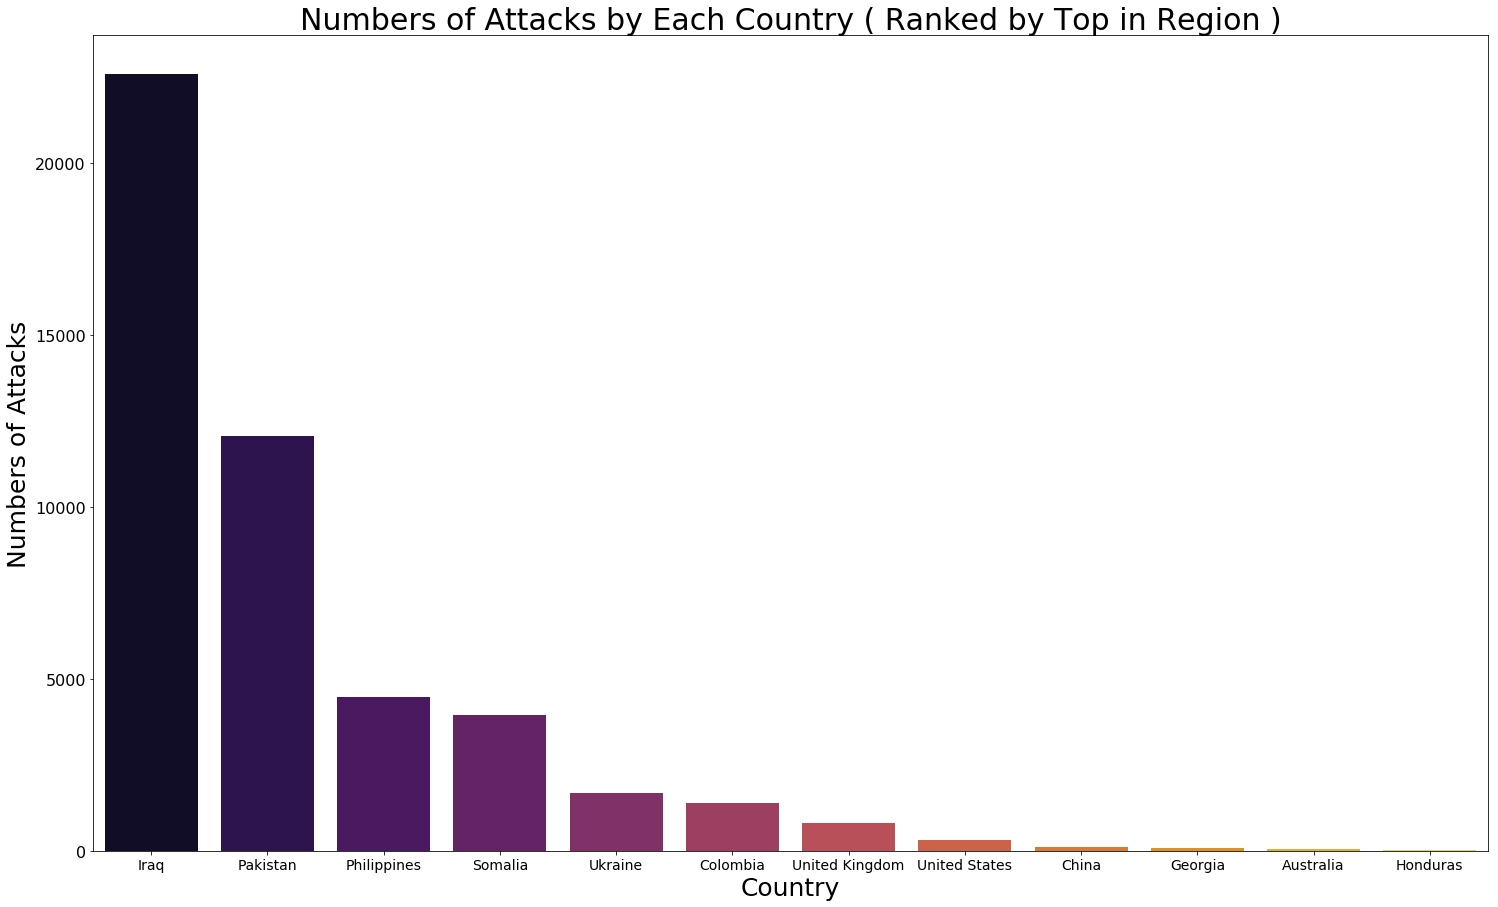

In [11]:
plt.figure(figsize= (25, 15))
xaxis = terrorRaw["Country"].value_counts().index
yaxis = terrorRaw["Country"].value_counts().values
sns.barplot(xaxis, yaxis, palette = 'inferno')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.xlabel('Country', fontsize = 25)
plt.ylabel('Numbers of Attacks', fontsize = 25)
plt.title('Numbers of Attacks by Each Country ( Ranked by Top in Region )', fontsize = 30)

Text(0, 0.5, 'Numbers of Terrorist Attacks')

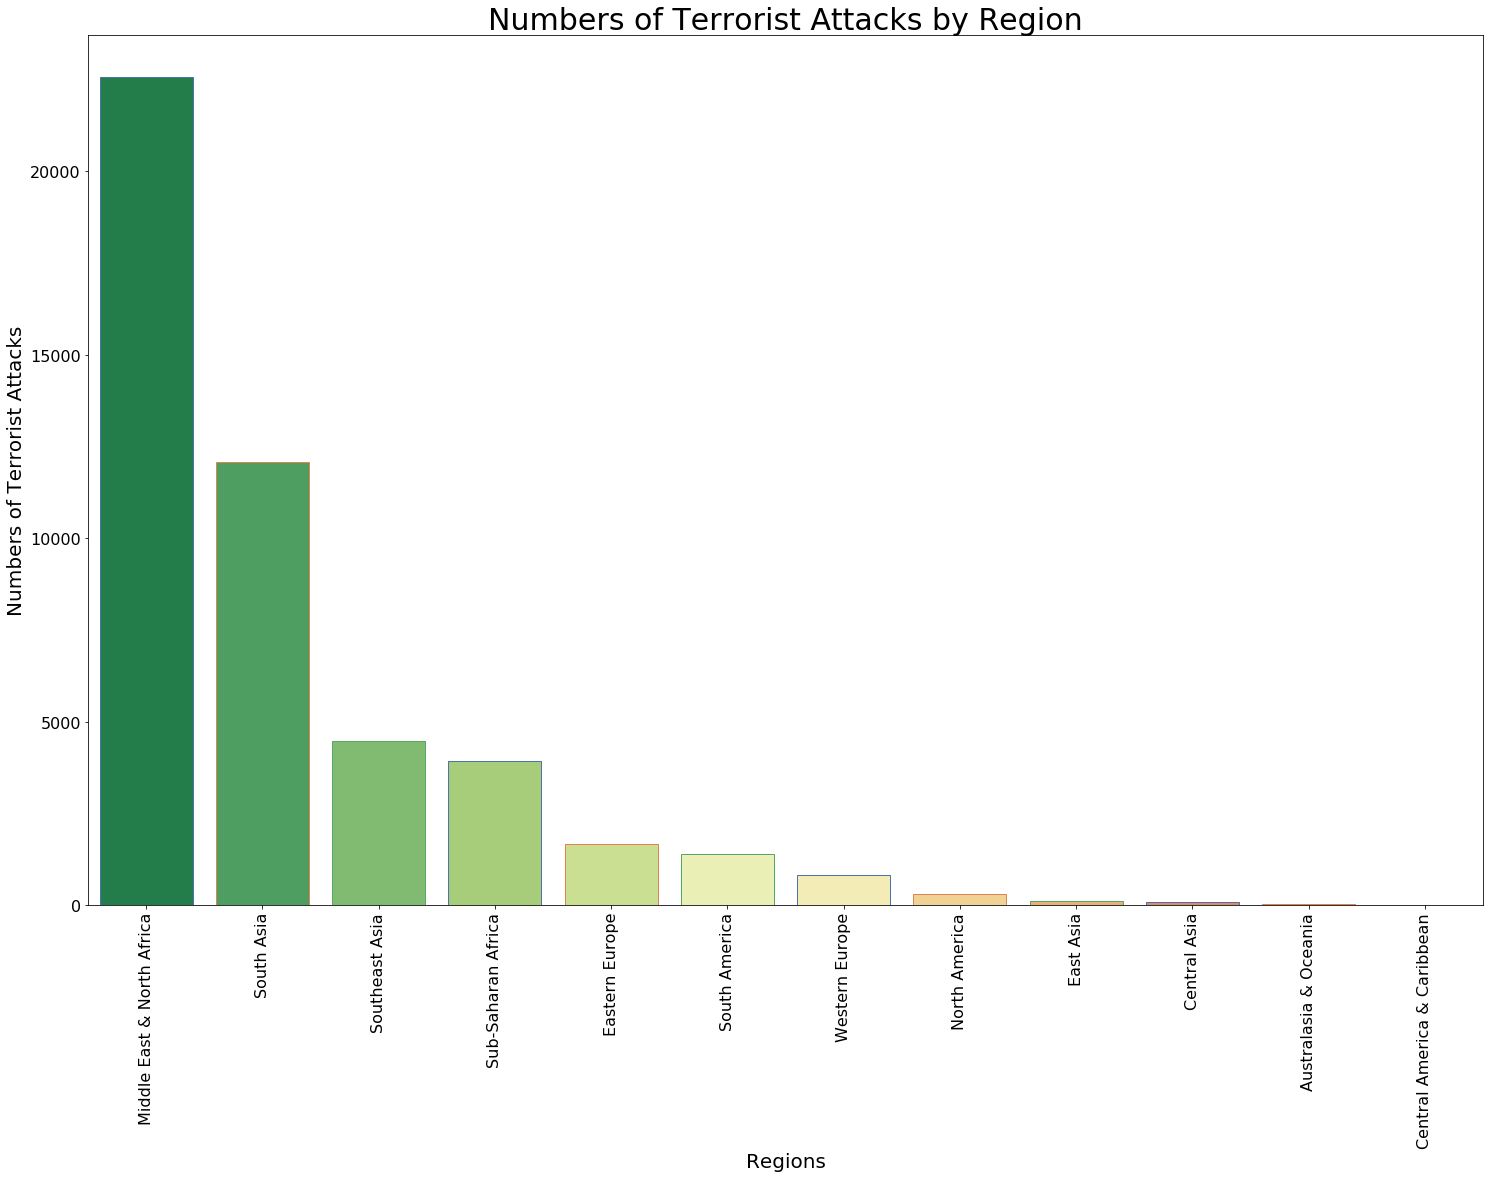

In [12]:
plt.figure(figsize = (25,16))
sns.countplot('Region', data = terrorRaw, palette = 'RdYlGn_r', order = terrorRaw['Region'].value_counts().index, 
     edgecolor = sns.color_palette('deep',3))
plt.title('Numbers of Terrorist Attacks by Region', fontsize = 30)
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Regions', fontsize = 20)
plt.ylabel('Numbers of Terrorist Attacks', fontsize = 20)

Text(0, 0.5, 'No. of Attacks')

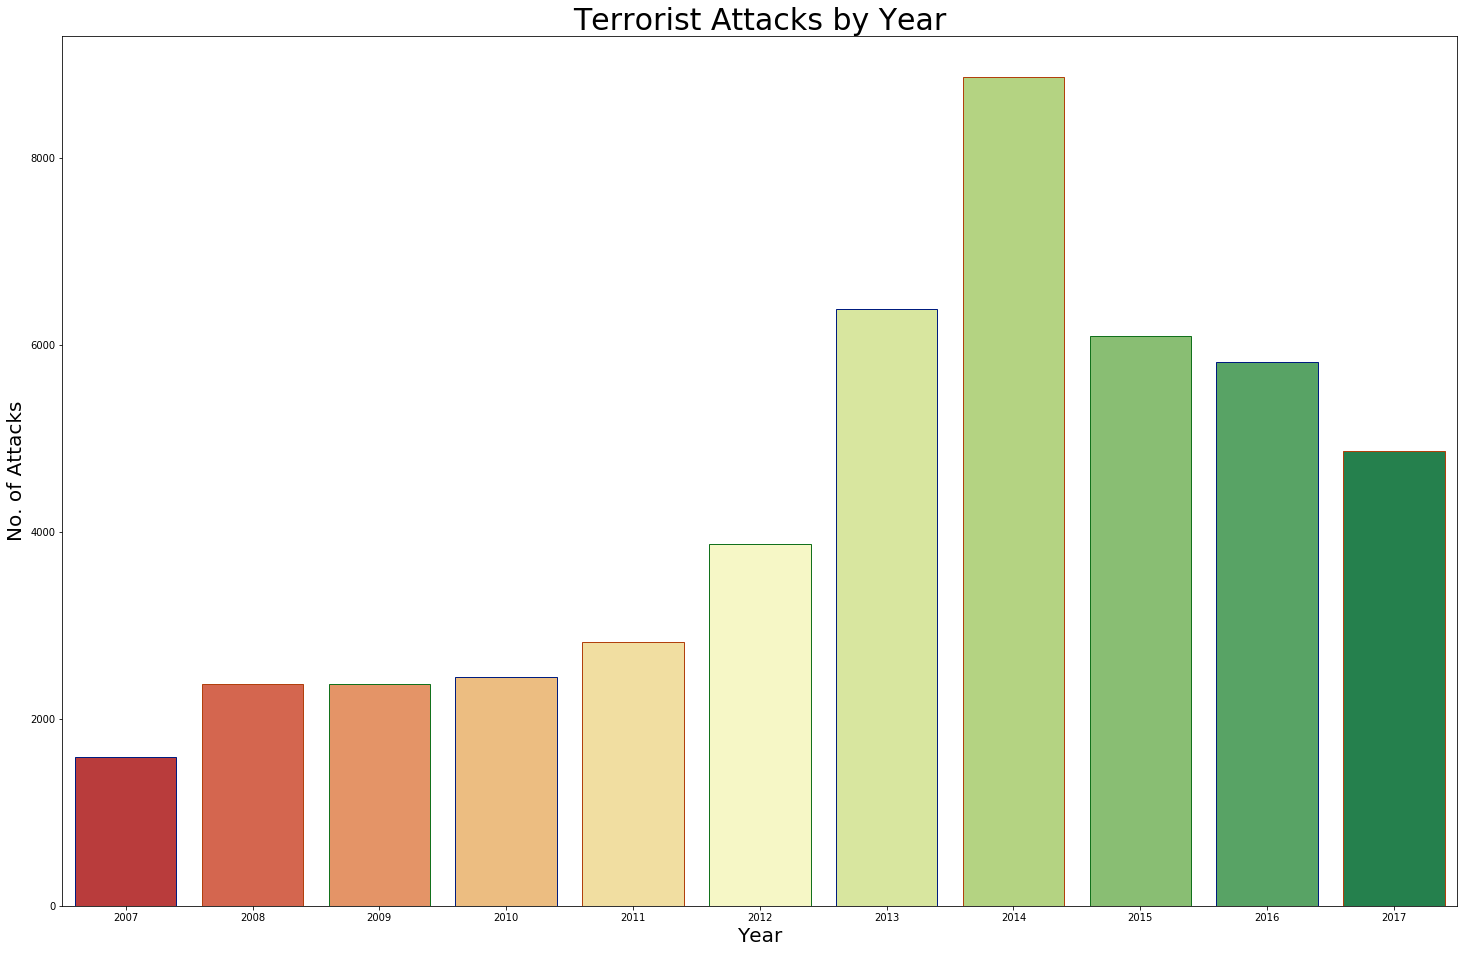

In [14]:
plt.figure(figsize= (25,16))
#Terrorist Attacks Happening Every Year.
sns.countplot('Year',data = terrorRaw , palette = 'RdYlGn', edgecolor = sns.color_palette('dark',3))
plt.title('Terrorist Attacks by Year', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('No. of Attacks', fontsize = 20)

Text(0.5, 1.0, 'All Types of Attacks stacked over each other')

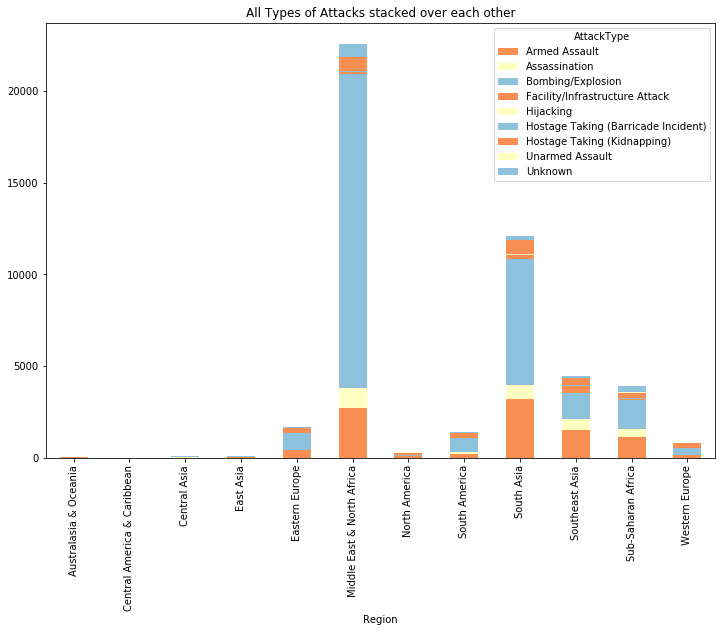

In [16]:
pd.crosstab(terrorRaw.Region, terrorRaw.AttackType).plot.bar(stacked = True, color = sns.color_palette('RdYlBu',3))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('All Types of Attacks stacked over each other')

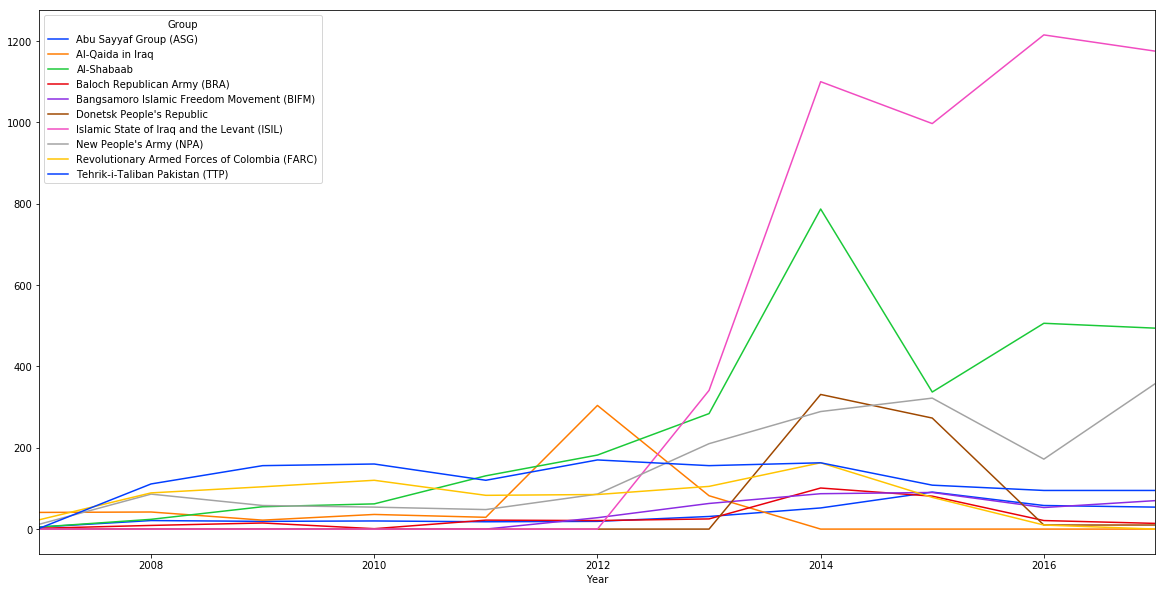

In [27]:
topGroups = terrorRaw[terrorRaw['Group'].isin(terrorRaw['Group'].value_counts()[1:11].index)]
pd.crosstab(topGroups.Year, topGroups.Group).plot(color = sns.color_palette('bright',9))
fig = plt.gcf()
fig.set_size_inches(20,10)

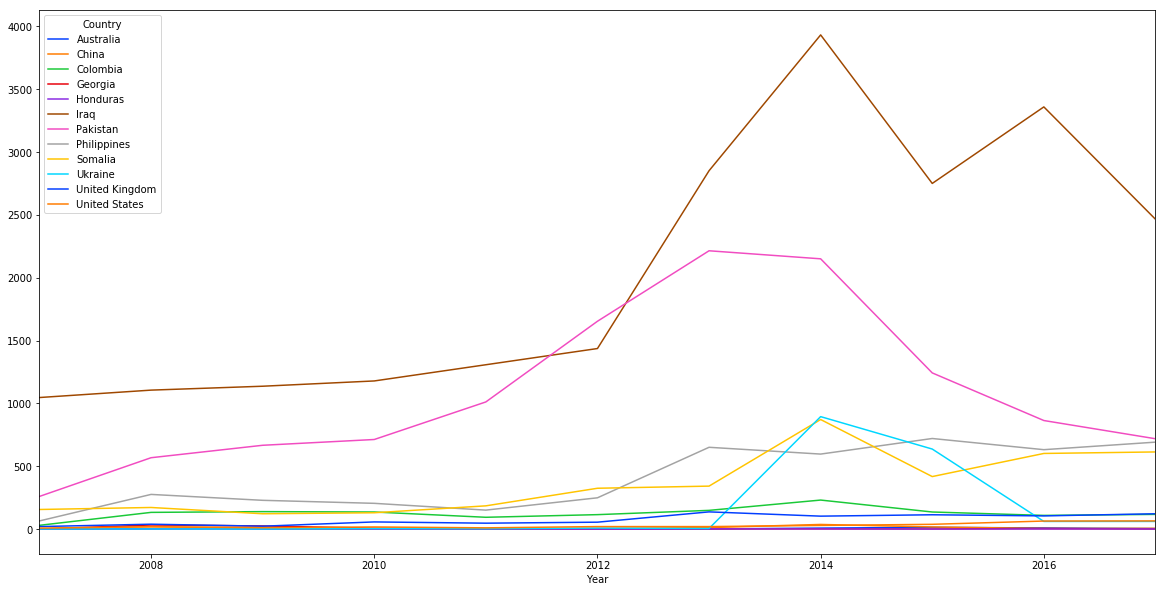

In [29]:
topCountry = terrorRaw[terrorRaw['Country'].isin(terrorRaw['Country'].value_counts().index)]
pd.crosstab(topCountry.Year, topCountry.Country).plot(color = sns.color_palette('bright',10))
fig = plt.gcf()
fig.set_size_inches(20,10)

Text(0, 0.5, 'Attacks Vs Casualties')

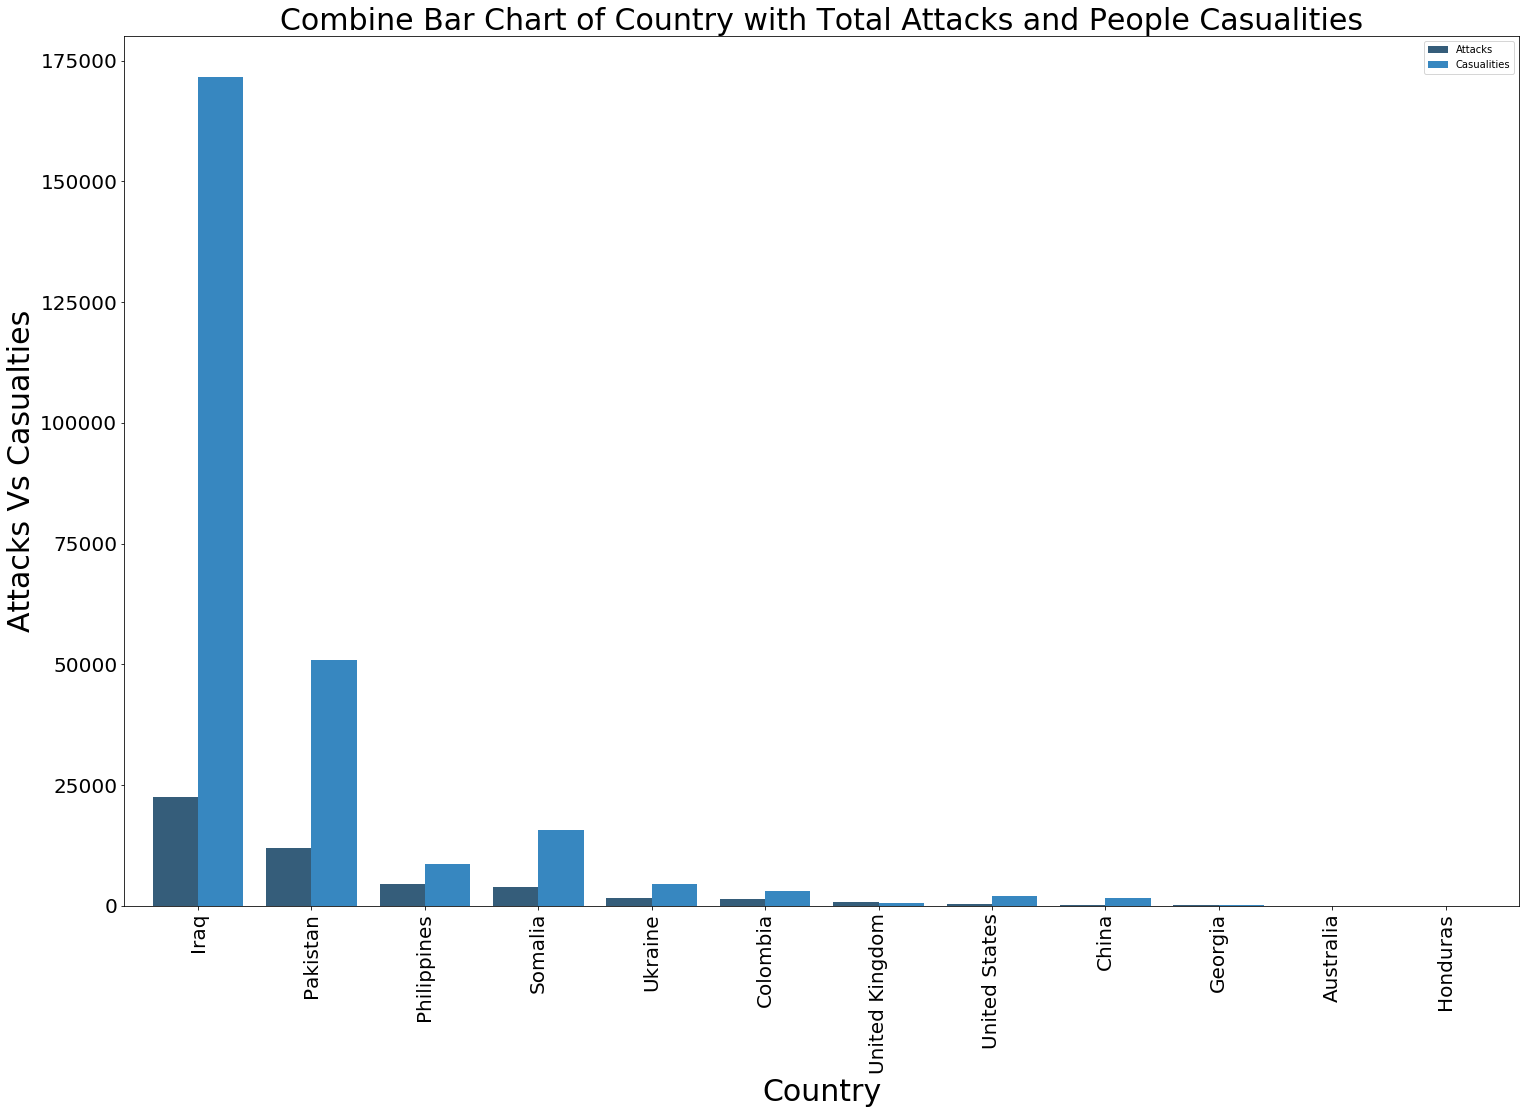

In [31]:
countTerror = terrorRaw['Country'].value_counts()[:15].to_frame()
countTerror.columns = ['Attacks']
countCasual = terrorRaw.groupby('Country')['Casualities'].sum().to_frame()
countTerror.merge(countCasual , left_index =True, right_index= True , how = 'left').plot.bar(width = 0.8, color = sns.color_palette('Blues_d',3))
fig = plt.gcf()
fig.set_size_inches(25,16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Combine Bar Chart of Country with Total Attacks and People Casualities', fontsize = 30)
plt.xlabel('Country', fontsize = 30)
plt.ylabel('Attacks Vs Casualties', fontsize = 30)

In [1]:
sns.pairplot(terrorRaw, hue='Year')

NameError: name 'sns' is not defined